### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Dataset Analysis

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

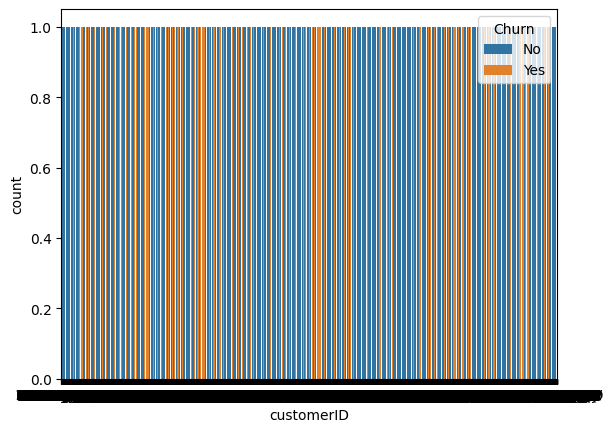

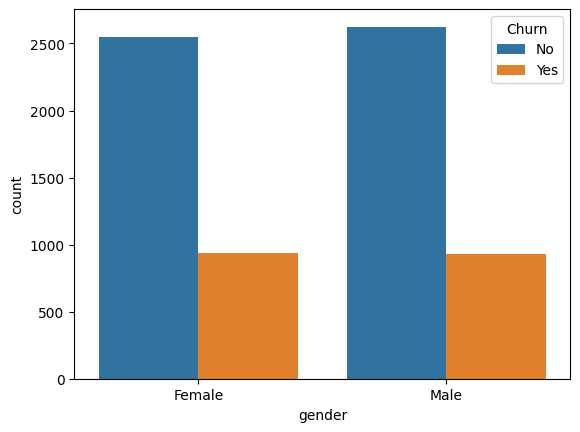

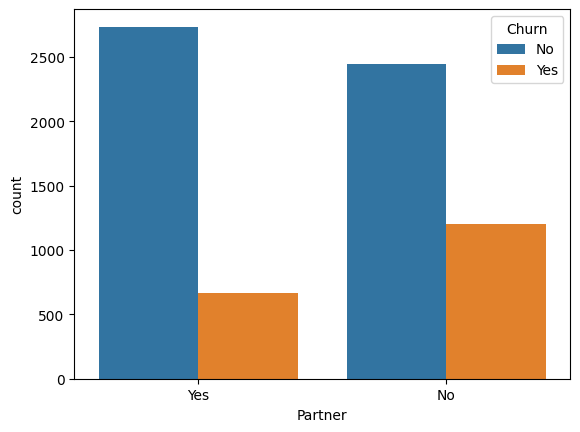

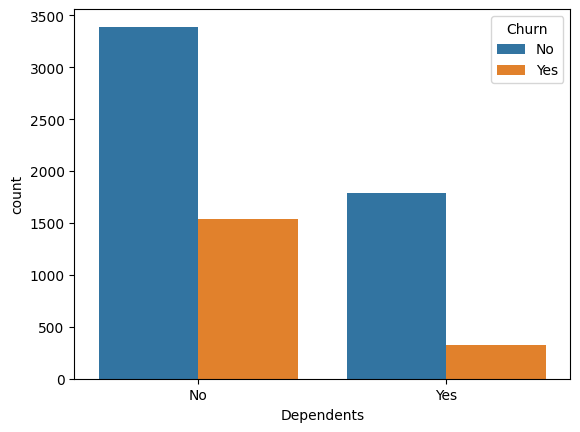

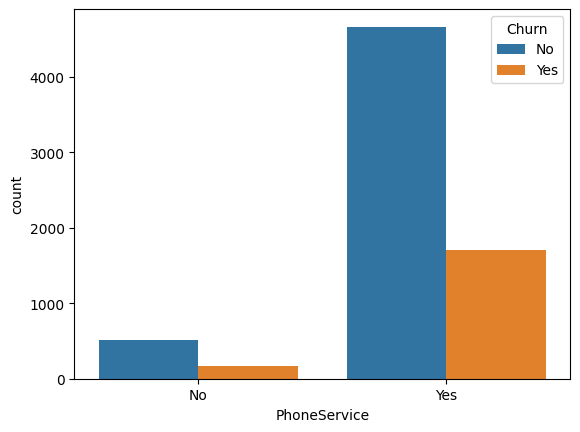

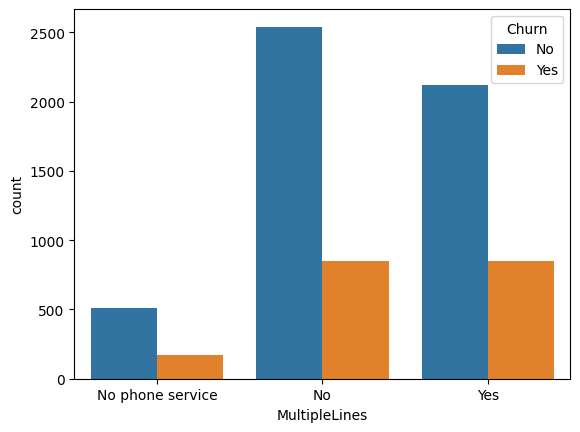

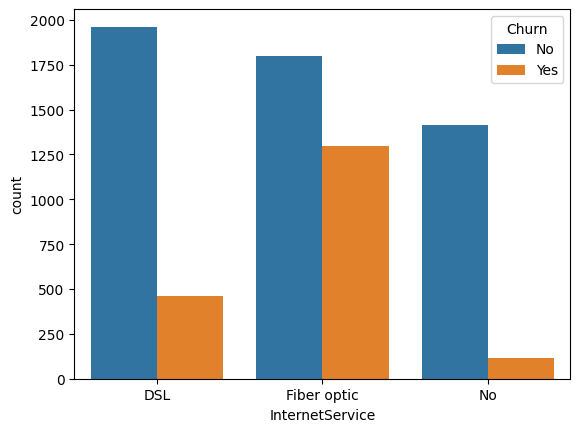

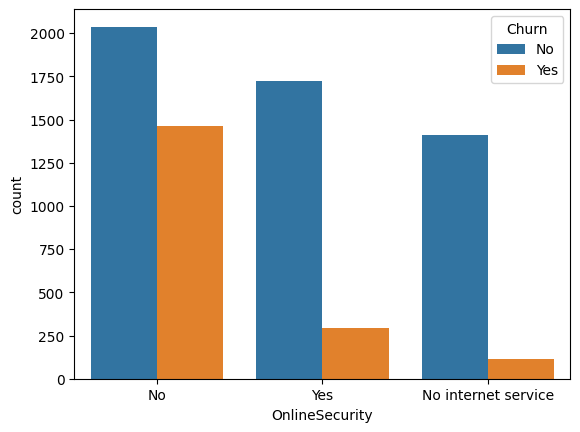

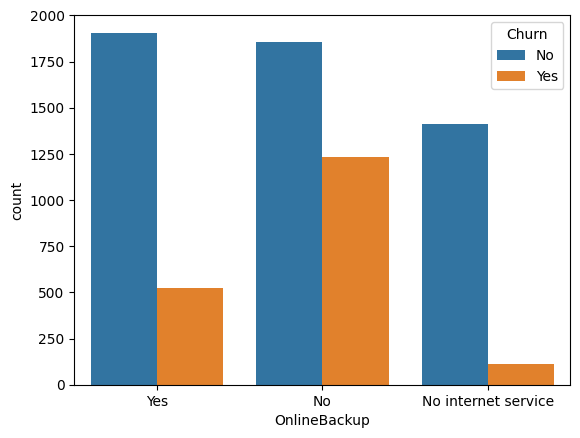

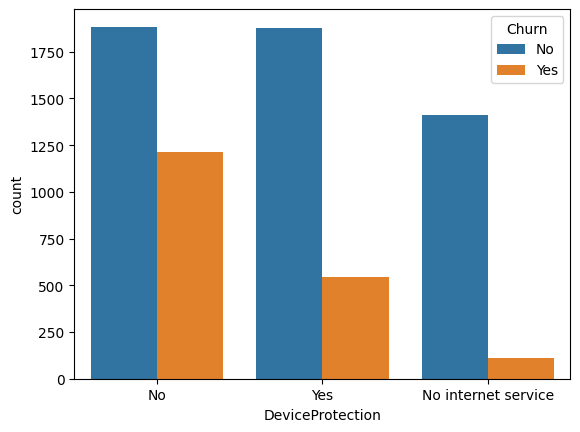

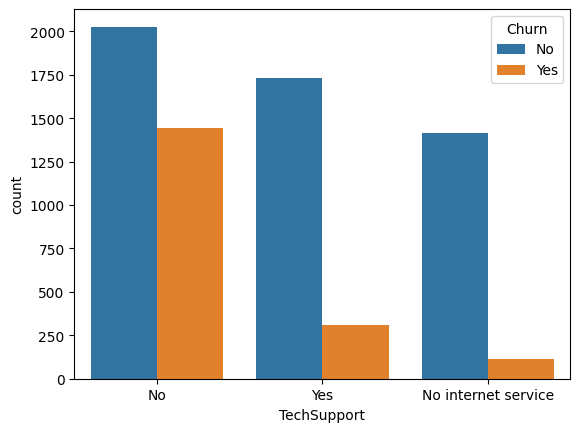

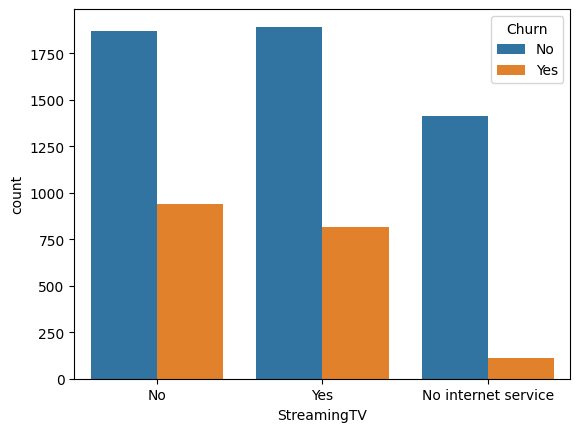

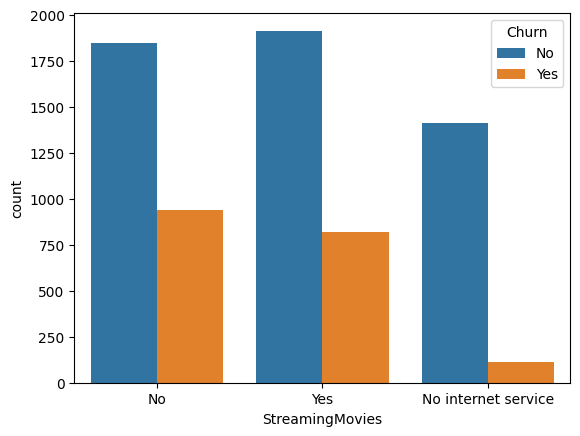

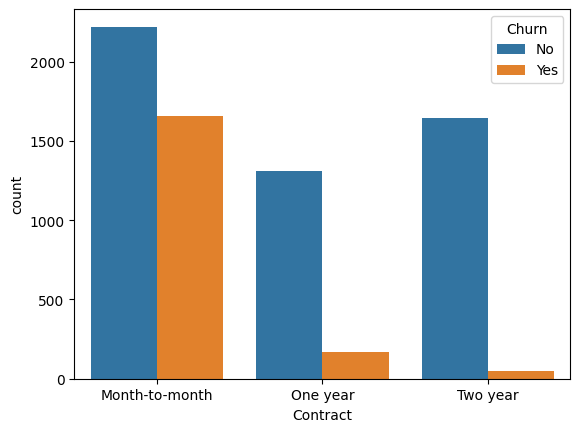

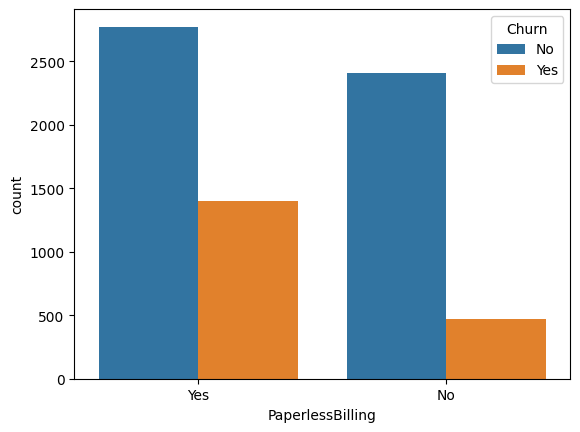

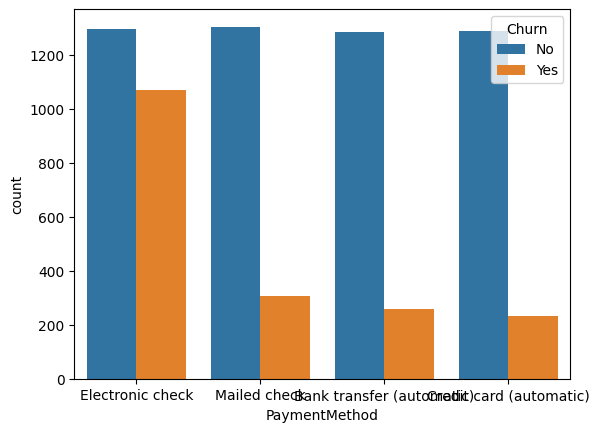

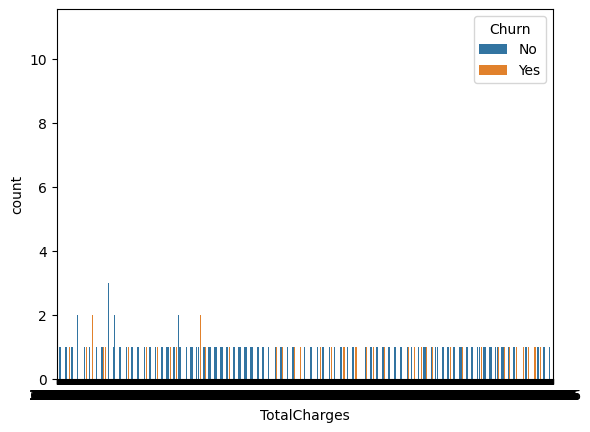

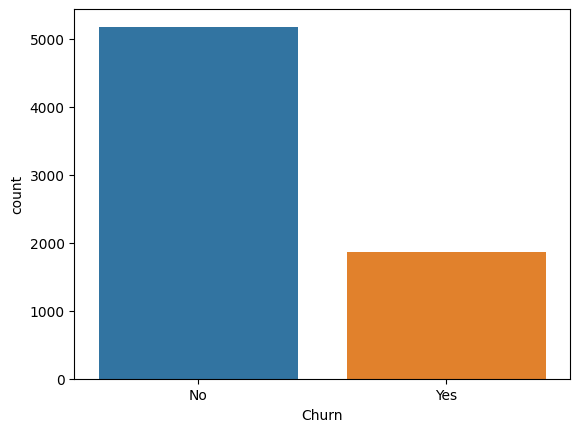

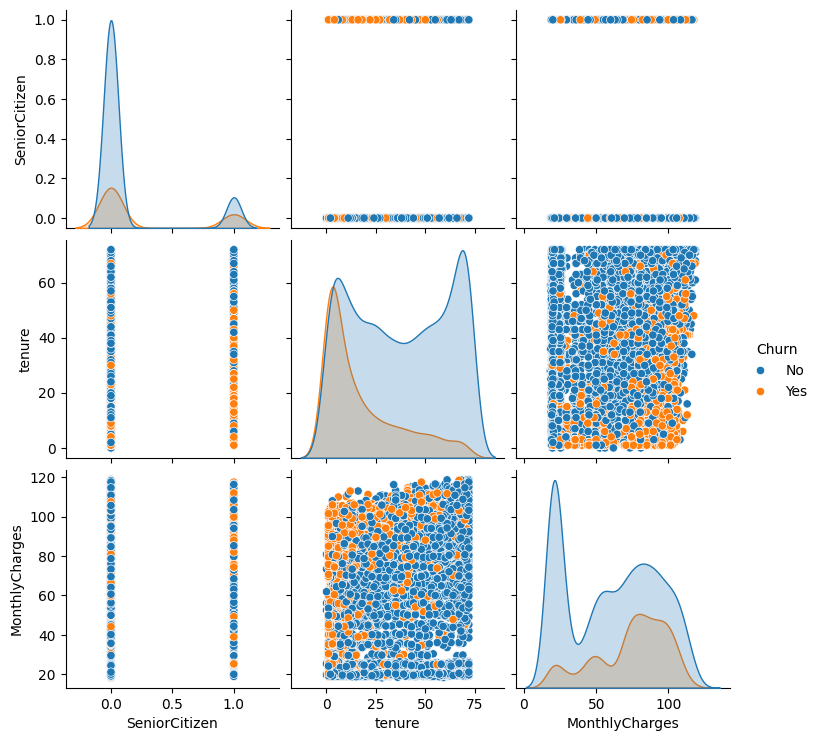

In [2]:
df = pd.read_csv("/home/alejandro/proyectos/platzi/ia/machine_learning/Logisticas/simple/dataframe.csv")

print(df.head())
print()
print(df.info()) # It's observed that the TotalCharges column is of object type, which is odd since it should only contain numerical values

# Plots of how other features relate to "Churn"

def plot(n):
    sns.countplot(data=df, x=n, hue="Churn")
    plt.show()

categorical_col = df.select_dtypes("object").columns
for i in categorical_col:
    plot(i)

sns.pairplot(data=df, hue="Churn")
plt.show()

### Dataset Preprocessing


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


/tmp/ipykernel_9557/2812653623.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations["Churn_Yes"], y=correlations.index, palette='viridis')


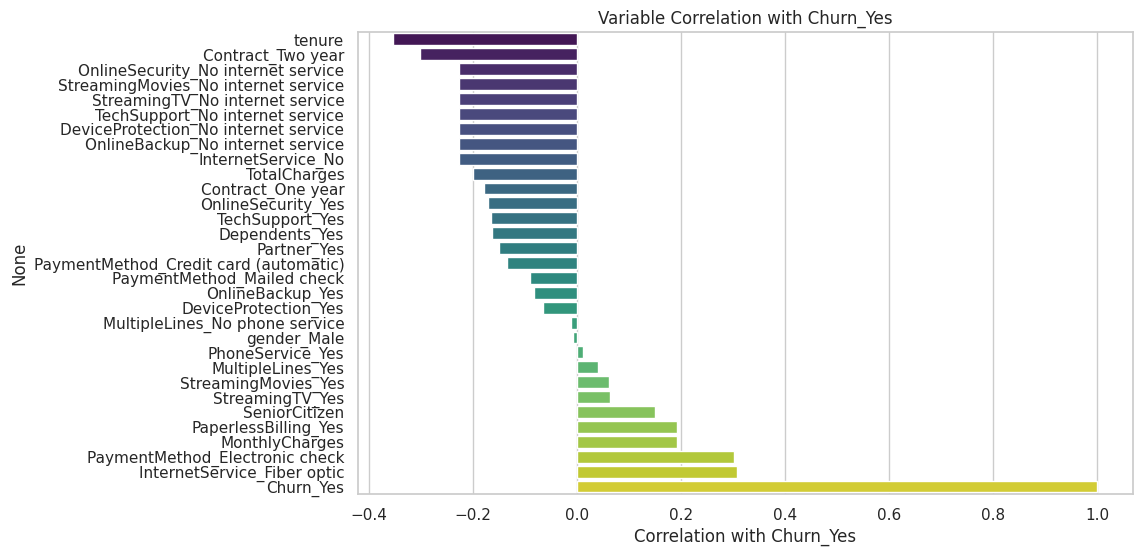

In [3]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce") # This converts the column to numeric type, ignoring errors

print()
print(df.isna().sum()) # 11 values detected as "na" not-a-number

df.dropna(inplace=True) # NA values are dropped
df.drop(["customerID"], axis=1, inplace=True) # The customerID column is dropped as it's unnecessary

df_prepro = df.copy()
df_prepro = pd.get_dummies(df, drop_first=True, dtype=int)

# Calculate correlation with respect to the target variable
correlations = df_prepro.corr()[["Churn_Yes"]].sort_values(by="Churn_Yes", ascending=True)

# Set Seaborn style to enhance the appearance of the plot
sns.set(style='whitegrid')

# Create an ascending bar plot (histogram) of the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations["Churn_Yes"], y=correlations.index, palette='viridis')

# Configure plot labels and title
plt.xlabel(f'Correlation with {"Churn_Yes"}')
plt.title(f'Variable Correlation with {"Churn_Yes"}')

# Show the plot
plt.show()

scaler = MinMaxScaler()

df_prepro_scale = scaler.fit_transform(df_prepro)
df_prepro_scale = pd.DataFrame(df_prepro_scale)
df_prepro_scale.columns = df_prepro.columns

### Training

In [4]:
x = df_prepro_scale.drop(["Churn_Yes"], axis=1)
y = df_prepro_scale["Churn_Yes"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### Prediction and Metrics

Accuracy is: 0.795734597156398


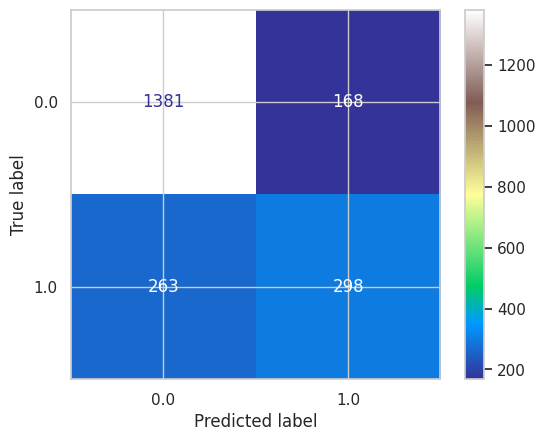

In [5]:
pred = model.predict(x_test)
print(f"Accuracy is: {accuracy_score(y_test,pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="terrain")
plt.show()